In [109]:
# É necessário antes de tudo instalar a biblioteca medmnist
# Importações
import numpy as np
from matplotlib import pyplot as plt
import os 
from tqdm import tqdm
import medmnist
from medmnist import INFO, Evaluator
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

## Importação da base de dados Breastmnist

In [110]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v2.1.0 @ https://github.com/MedMNIST/MedMNIST/


In [111]:
# Importando o dataset breastmnist
data_flag = 'breastmnist'
download = True

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [112]:
# carregando os dados
train_dataset = DataClass(split='train', download=download)
val_dataset = DataClass(split='val', download=download)
test_dataset = DataClass(split='test', download=download)

Using downloaded and verified file: C:\Users\Luis\.medmnist\breastmnist.npz
Using downloaded and verified file: C:\Users\Luis\.medmnist\breastmnist.npz
Using downloaded and verified file: C:\Users\Luis\.medmnist\breastmnist.npz


In [113]:
print(train_dataset)

Dataset BreastMNIST (breastmnist)
    Number of datapoints: 546
    Root location: C:\Users\Luis\.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0


In [114]:
print(val_dataset)

Dataset BreastMNIST (breastmnist)
    Number of datapoints: 78
    Root location: C:\Users\Luis\.medmnist
    Split: val
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0


In [115]:
print(test_dataset)

Dataset BreastMNIST (breastmnist)
    Number of datapoints: 156
    Root location: C:\Users\Luis\.medmnist
    Split: test
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0


In [116]:
# Separando os labels por conjuntos:
train_labels = train_dataset.labels
val_labels = val_dataset.labels
test_labels = test_dataset.labels

In [117]:
# Separando as images por conjuntos:
train_img = train_dataset.imgs
val_img = val_dataset.imgs
test_img = test_dataset.imgs

In [118]:
print(train_img.shape)
print(val_img.shape)
print(test_img.shape)

(546, 28, 28)
(78, 28, 28)
(156, 28, 28)


In [119]:
print(train_img[0].shape)

(28, 28)


Rótulo: [1]


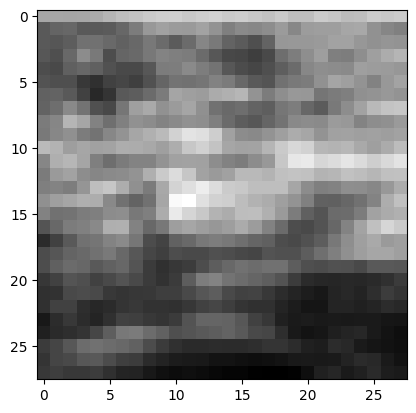

In [120]:
# Vizualização da primeira imagem do conjunto de treinamento
print(f"Rótulo: {train_labels[0]}")
plt.imshow(train_img[0],cmap="gray")

Rótulo: [0]


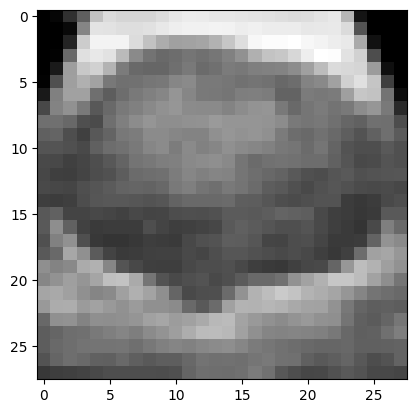

In [121]:
# Vizualização da quarta imagem do conjunto de treinamento
print(f"Rótulo: {train_labels[4]}")
plt.imshow(train_img[4],cmap="gray")

## Análise do balanceamento das classes nos conjuntos disponíveis

In [122]:
# Conjunto de treino
num_negativas_t = (train_labels==0).sum()
num_positivas_t = (train_labels==1).sum()
p_negativas_t = num_negativas_t*100/len(train_labels)
p_positivas_t = num_positivas_t*100/len(train_labels)
print("No conjunto de treinamento há",num_negativas_t, "classes negativas")
print("Porcentagem de classes negativas:",p_negativas_t,"%")
print("No conjunto de treinamento há",num_positivas_t, "classes positivas")
print("Porcentagem de classes positivas:",p_positivas_t,"%")

No conjunto de treinamento há 147 classes negativas
Porcentagem de classes negativas: 26.923076923076923 %
No conjunto de treinamento há 399 classes positivas
Porcentagem de classes positivas: 73.07692307692308 %


In [123]:
# Conjunto de validação
num_negativas_v = (val_labels==0).sum()
num_positivas_v = (val_labels==1).sum()
p_negativas_v = num_negativas_v*100/len(val_labels)
p_positivas_v = num_positivas_v*100/len(val_labels)
print("No conjunto de validação há",num_negativas_v, "classes negativas")
print("Porcentagem de classes negativas:",p_negativas_v,"%")
print("No conjunto de validação há",num_positivas_v, "classes positivas")
print("Porcentagem de classes positivas:",p_positivas_v,"%")

No conjunto de validação há 21 classes negativas
Porcentagem de classes negativas: 26.923076923076923 %
No conjunto de validação há 57 classes positivas
Porcentagem de classes positivas: 73.07692307692308 %


In [124]:
# Conjunto de teste
num_negativas_tt = (test_labels==0).sum()
num_positivas_tt = (test_labels==1).sum()
p_negativas_tt = num_negativas_tt*100/len(test_labels)
p_positivas_tt = num_positivas_tt*100/len(test_labels)
print("No conjunto de teste há",num_negativas_tt, "classes negativas")
print("Porcentagem de classes negativas:",p_negativas_tt,"%")
print("No conjunto de teste há",num_positivas_tt, "classes positivas")
print("Porcentagem de classes positivas:",p_positivas_tt,"%")

No conjunto de teste há 42 classes negativas
Porcentagem de classes negativas: 26.923076923076923 %
No conjunto de teste há 114 classes positivas
Porcentagem de classes positivas: 73.07692307692308 %


## Regressão Logística e Validação Cruzada

In [125]:
# Preparando os dados para a regressão logística
# Foi transformando o array de matrizes em um único array de dimensão compatível com as labels
# Após essas transformações, cada linha dos conjuntos se refere a uma label
x_train=np.reshape(train_img,(len(train_labels),28*28))
x_val=np.reshape(val_img,(len(val_labels),28*28))
x_test=np.reshape(test_img,(len(test_labels),28*28))
y_train=train_labels
y_val=val_labels
y_test=test_labels
# Criando o conjunto validação+treino para uso posterior
x_tv=np.concatenate((x_train,x_val))
y_tv=np.concatenate((y_train,y_val))
print(x_train.shape)
print(x_train)
print(x_val.shape)
print(x_val)
print(x_test.shape)
print(x_test)
print(x_tv.shape)
print(x_tv)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
print(y_tv.shape)

(546, 784)
[[139 139 138 ...  51  42  40]
 [ 82  85  83 ...  26  22  19]
 [157 155 151 ...  77  79  72]
 ...
 [159 160 167 ...  50  55  56]
 [ 55  57  61 ...  14  15  15]
 [158 159 172 ...  20  21  20]]
(78, 784)
[[177 174 172 ...  27  32  33]
 [118 123 126 ...  14  14  14]
 [186 181 180 ...  22  20  20]
 ...
 [147 153 160 ...  76  66  55]
 [165 169 167 ...  21  25  27]
 [150 147 141 ...  19  19  19]]
(156, 784)
[[184 183 174 ...  15  18  20]
 [ 43  44  51 ...  12  12  11]
 [187 179 174 ...  46  42  41]
 ...
 [127 127 125 ...  23  24  24]
 [109 107 112 ...   1   1   1]
 [173 164 165 ...  17  18  19]]
(624, 784)
[[139 139 138 ...  51  42  40]
 [ 82  85  83 ...  26  22  19]
 [157 155 151 ...  77  79  72]
 ...
 [147 153 160 ...  76  66  55]
 [165 169 167 ...  21  25  27]
 [150 147 141 ...  19  19  19]]
(546, 1)
(78, 1)
(156, 1)
(624, 1)


In [126]:
# Reescalonando os dados das imagens dividindo pelo valor máximo do conjunto completo que é 255
x_train_n = x_train/255
x_val_n = x_val/255
x_test_n = x_test/255
x_tv_n = x_tv/255
print(x_train_n.shape)
print(x_val_n.shape)
print(x_test_n.shape)
print(x_tv_n.shape)

(546, 784)
(78, 784)
(156, 784)
(624, 784)


In [127]:
# Testando a Regressão Logística
# Como o dataset é pequeno, foi escolhido o solver liblinear 
# Foi escolhido 3000 como o número máximo de iterações, penalidade do tipo l2 com fator de regularização C de 1
lr = LogisticRegression(penalty='l2', C=1, class_weight='balanced', solver='liblinear', max_iter=3000)
lr.fit(x_train_n, y_train)
# Probabilidades estimadas
y_proba = lr.predict_proba(x_val_n)
# Acurácia média
score_train= lr.score(x_train_n, y_train)
score_val= lr.score(x_val_n, y_val)
score_test= lr.score(x_test_n, y_test)
print(y_proba)
print(y_proba.shape)
print(score_train)
print(score_val)
print(score_test)

[[0.05834878 0.94165122]
 [0.42038305 0.57961695]
 [0.32524313 0.67475687]
 [0.86714307 0.13285693]
 [0.46531428 0.53468572]
 [0.08908266 0.91091734]
 [0.07292876 0.92707124]
 [0.62444989 0.37555011]
 [0.0805747  0.9194253 ]
 [0.39020689 0.60979311]
 [0.28897765 0.71102235]
 [0.5200695  0.4799305 ]
 [0.33419819 0.66580181]
 [0.17997913 0.82002087]
 [0.59009362 0.40990638]
 [0.07877743 0.92122257]
 [0.34523132 0.65476868]
 [0.04077406 0.95922594]
 [0.39277575 0.60722425]
 [0.05610199 0.94389801]
 [0.92876562 0.07123438]
 [0.30365479 0.69634521]
 [0.32681273 0.67318727]
 [0.15225564 0.84774436]
 [0.09881965 0.90118035]
 [0.04982112 0.95017888]
 [0.32653061 0.67346939]
 [0.54257104 0.45742896]
 [0.97462006 0.02537994]
 [0.11660727 0.88339273]
 [0.46559369 0.53440631]
 [0.38329095 0.61670905]
 [0.02075876 0.97924124]
 [0.96764783 0.03235217]
 [0.06409812 0.93590188]
 [0.45777249 0.54222751]
 [0.02415066 0.97584934]
 [0.28463232 0.71536768]
 [0.37825575 0.62174425]
 [0.30178233 0.69821767]


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [128]:
# Validação Cruzada pelo GridSearchCV
# Foram fixados, dentre os parâmetros da Regressão Logística, apenas o solver como liblinear e as iterações maximas como 3000
# Tipo de regularização variando entre nenhuma, l1 e l2:
penalty_vector = ["none", "l1", "l2"]
# Valores inversos da força da regularização (valores menores representam regularizações maiores):
C_vector = [1000, 100, 10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
# Peso das classes variando entre balanceado e não balanceado:
c_weight_vector = ["balanced", None]
# dicionário dos parâmetros da regressão logística para a serem utilizados no GridSearchCV
dict_grid={'penalty':penalty_vector,'C':C_vector,'class_weight': c_weight_vector}
logreg = LogisticRegression(solver='liblinear', max_iter=3000)
# Foi escolhida a validação cruzada padrão do GridSearchCV que é kfold para 5 folds, será aplicada no conjunto treino+validação
# O parâmetro verbose printa mensagens 
CV = GridSearchCV(estimator=logreg, param_grid=dict_grid, cv=5, verbose=4)
CV_fit=CV.fit(x_tv_n,y_tv)
# Melhores parâmetros
CV_fit.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END C=1000, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=1000, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=1000, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=1000, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=1000, class_weight=balanced, penalty=none;, score=nan total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1000, class_weight=balanced, penalty=l1;, score=0.736 total time=   1.4s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, class_weight=balanced, penalty=l1;, score=0.768 total time=   1.6s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, class_weight=balanced, penalty=l1;, score=0.792 total time=   1.4s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, class_weight=balanced, penalty=l1;, score=0.752 total time=   1.3s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, class_weight=balanced, penalty=l1;, score=0.798 total time=   1.4s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1000, class_weight=balanced, penalty=l2;, score=0.744 total time=   0.1s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, class_weight=balanced, penalty=l2;, score=0.752 total time=   0.2s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, class_weight=balanced, penalty=l2;, score=0.792 total time=   0.2s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, class_weight=balanced, penalty=l2;, score=0.752 total time=   0.1s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, class_weight=balanced, penalty=l2;, score=0.798 total time=   0.2s
[CV 1/5] END C=1000, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=1000, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=1000, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=1000, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=1000, class_weight=None, penalty=none;, score=nan total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1000, class_weight=None, penalty=l1;, score=0.776 total time=   0.5s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, class_weight=None, penalty=l1;, score=0.792 total time=   0.5s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, class_weight=None, penalty=l1;, score=0.784 total time=   0.5s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, class_weight=None, penalty=l1;, score=0.728 total time=   0.5s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, class_weight=None, penalty=l1;, score=0.815 total time=   0.5s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1000, class_weight=None, penalty=l2;, score=0.744 total time=   0.2s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, class_weight=None, penalty=l2;, score=0.776 total time=   0.2s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, class_weight=None, penalty=l2;, score=0.784 total time=   0.2s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, class_weight=None, penalty=l2;, score=0.744 total time=   0.2s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, class_weight=None, penalty=l2;, score=0.798 total time=   0.2s
[CV 1/5] END C=100, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=100, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=100, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=100, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=100, class_weight=balanced, penalty=none;, score=nan total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=100, class_weight=balanced, penalty=l1;, score=0.760 total time=   2.3s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=100, class_weight=balanced, penalty=l1;, score=0.728 total time=   2.3s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, class_weight=balanced, penalty=l1;, score=0.816 total time=   2.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, class_weight=balanced, penalty=l1;, score=0.760 total time=   1.9s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, class_weight=balanced, penalty=l1;, score=0.798 total time=   2.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=100, class_weight=balanced, penalty=l2;, score=0.744 total time=   0.1s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=100, class_weight=balanced, penalty=l2;, score=0.760 total time=   0.1s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, class_weight=balanced, penalty=l2;, score=0.784 total time=   0.1s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, class_weight=balanced, penalty=l2;, score=0.760 total time=   0.1s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, class_weight=balanced, penalty=l2;, score=0.798 total time=   0.2s
[CV 1/5] END C=100, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=100, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=100, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=100, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=100, class_weight=None, penalty=none;, score=nan total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=100, class_weight=None, penalty=l1;, score=0.744 total time=   0.8s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=100, class_weight=None, penalty=l1;, score=0.744 total time=   0.9s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, class_weight=None, penalty=l1;, score=0.800 total time=   0.8s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, class_weight=None, penalty=l1;, score=0.744 total time=   0.7s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, class_weight=None, penalty=l1;, score=0.798 total time=   0.9s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=100, class_weight=None, penalty=l2;, score=0.760 total time=   0.2s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=100, class_weight=None, penalty=l2;, score=0.784 total time=   0.2s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, class_weight=None, penalty=l2;, score=0.768 total time=   0.2s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, class_weight=None, penalty=l2;, score=0.744 total time=   0.1s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, class_weight=None, penalty=l2;, score=0.798 total time=   0.1s
[CV 1/5] END C=10, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=10, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=10, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=10, class_weight=balanced, penalty=none;, score=nan total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=10, class_weight=balanced, penalty=l1;, score=0.760 total time=   1.4s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=10, class_weight=balanced, penalty=l1;, score=0.736 total time=   1.4s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=10, class_weight=balanced, penalty=l1;, score=0.800 total time=   1.3s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=10, class_weight=balanced, penalty=l1;, score=0.768 total time=   1.7s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=10, class_weight=balanced, penalty=l1;, score=0.790 total time=   1.4s
[CV 1/5] END C=10, class_weight=balanced, penalty=l2;, score=0.760 total time=   0.1s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=10, class_weight=balanced, penalty=l2;, score=0.752 total time=   0.1s
[CV 3/5] END C=10, class_weight=balanced, penalty=l2;, score=0.768 total time=   0.1s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=10, class_weight=balanced, penalty=l2;, score=0.776 total time=   0.1s
[CV 5/5] END C=10, class_weight=balanced, penalty=l2;, score=0.790 total time=   0.1s
[CV 1/5] END C=10, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=10, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=10, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=10, class_weight=None, penalty=none;, score=nan total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=10, class_weight=None, penalty=l1;, score=0.768 total time=   0.6s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=10, class_weight=None, penalty=l1;, score=0.736 total time=   0.5s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=10, class_weight=None, penalty=l1;, score=0.808 total time=   0.5s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=10, class_weight=None, penalty=l1;, score=0.792 total time=   0.5s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=10, class_weight=None, penalty=l1;, score=0.790 total time=   0.6s
[CV 1/5] END C=10, class_weight=None, penalty=l2;, score=0.744 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=10, class_weight=None, penalty=l2;, score=0.776 total time=   0.1s
[CV 3/5] END C=10, class_weight=None, penalty=l2;, score=0.816 total time=   0.1s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=10, class_weight=None, penalty=l2;, score=0.776 total time=   0.1s
[CV 5/5] END C=10, class_weight=None, penalty=l2;, score=0.790 total time=   0.1s
[CV 1/5] END C=1, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=1, class_weight=balanced, penalty=none;, score=nan total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1, class_weight=balanced, penalty=l1;, score=0.768 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, penalty=l1;, score=0.744 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1, class_weight=balanced, penalty=l1;, score=0.744 total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, penalty=l1;, score=0.752 total time=   0.0s
[CV 5/5] END C=1, class_weight=balanced, penalty=l1;, score=0.750 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1, class_weight=balanced, penalty=l2;, score=0.776 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, penalty=l2;, score=0.744 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1, class_weight=balanced, penalty=l2;, score=0.776 total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, penalty=l2;, score=0.752 total time=   0.0s
[CV 5/5] END C=1, class_weight=balanced, penalty=l2;, score=0.806 total time=   0.0s
[CV 1/5] END C=1, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=1, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=1, class_weight=None, penalty=none;, score=nan total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1, class_weight=None, penalty=l1;, score=0.824 total time=   0.0s
[CV 2/5] END C=1, class_weight=None, penalty=l1;, score=0.744 total time=   0.0s
[CV 3/5] END C=1, class_weight=None, penalty=l1;, score=0.784 total time=   0.0s
[CV 4/5] END C=1, class_weight=None, penalty=l1;, score=0.776 total time=   0.0s
[CV 5/5] END C=1, class_weight=None, penalty=l1;, score=0.798 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 1/5] END C=1, class_weight=None, penalty=l2;, score=0.792 total time=   0.0s
[CV 2/5] END C=1, class_weight=None, penalty=l2;, score=0.744 total time=   0.0s
[CV 3/5] END C=1, class_weight=None, penalty=l2;, score=0.816 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1, class_weight=None, penalty=l2;, score=0.808 total time=   0.0s
[CV 5/5] END C=1, class_weight=None, penalty=l2;, score=0.790 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, class_weight=balanced, penalty=l1;, score=0.736 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, penalty=l1;, score=0.712 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 3/5] END C=0.1, class_weight=balanced, penalty=l1;, score=0.736 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, penalty=l1;, score=0.664 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, penalty=l1;, score=0.710 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=balanced, penalty=l2;, score=0.752 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, penalty=l2;, score=0.736 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 3/5] END C=0.1, class_weight=balanced, penalty=l2;, score=0.760 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, penalty=l2;, score=0.712 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, penalty=l2;, score=0.742 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, class_weight=None, penalty=l1;, score=0.736 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=None, penalty=l1;, score=0.728 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=None, penalty=l1;, score=0.728 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 4/5] END C=0.1, class_weight=None, penalty=l1;, score=0.728 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=None, penalty=l1;, score=0.734 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=None, penalty=l2;, score=0.824 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=None, penalty=l2;, score=0.776 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=None, penalty=l2;, score=0.784 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 4/5] END C=0.1, class_weight=None, penalty=l2;, score=0.808 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=None, penalty=l2;, score=0.815 total time=   0.0s
[CV 1/5] END C=0.01, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, class_weight=balanced, penalty=l1;, score=0.264 total time=   0.0s
[CV 2/5] END C=0.01, class_weight=balanced, penalty=l1;, score=0.272 total time=   0.0s
[CV 3/5] END C=0.01, class_weight=balanced, penalty=l1;, score=0.272 total time=   0.0s
[CV 4/5] END C=0.01, class_weight=balanced, penalty=l1;, score=0.272 total time=   0.0s
[CV 5/5] END C=0.01, class_weight=balanced

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 2/5] END C=0.01, class_weight=balanced, penalty=l2;, score=0.720 total time=   0.0s
[CV 3/5] END C=0.01, class_weight=balanced, penalty=l2;, score=0.720 total time=   0.0s
[CV 4/5] END C=0.01, class_weight=balanced, penalty=l2;, score=0.680 total time=   0.0s
[CV 5/5] END C=0.01, class_weight=balanced, penalty=l2;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.01, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, class_weight=None, penalty=l1;, score=0.736 total time=   0.0s
[CV 2/5] END C=0.01, class_weight=None, penalty=l1;, score=0.728 total time=   0.0s
[CV 3/5] END C=0.01, class_weight=None, penalty=l1;, score=0

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 5/5] END C=0.01, class_weight=None, penalty=l1;, score=0.734 total time=   0.0s
[CV 1/5] END C=0.01, class_weight=None, penalty=l2;, score=0.784 total time=   0.0s
[CV 2/5] END C=0.01, class_weight=None, penalty=l2;, score=0.728 total time=   0.0s
[CV 3/5] END C=0.01, class_weight=None, penalty=l2;, score=0.728 total time=   0.0s
[CV 4/5] END C=0.01, class_weight=None, penalty=l2;, score=0.784 total time=   0.0s
[CV 5/5] END C=0.01, class_weight=None, penalty=l2;, score=0.798 total time=   0.0s
[CV 1/5] END C=0.001, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, class_weight=balanced, penalt

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 3/5] END C=0.001, class_weight=balanced, penalty=l1;, score=0.272 total time=   0.0s
[CV 4/5] END C=0.001, class_weight=balanced, penalty=l1;, score=0.272 total time=   0.0s
[CV 5/5] END C=0.001, class_weight=balanced, penalty=l1;, score=0.266 total time=   0.0s
[CV 1/5] END C=0.001, class_weight=balanced, penalty=l2;, score=0.712 total time=   0.0s
[CV 2/5] END C=0.001, class_weight=balanced, penalty=l2;, score=0.712 total time=   0.0s
[CV 3/5] END C=0.001, class_weight=balanced, penalty=l2;, score=0.728 total time=   0.0s
[CV 4/5] END C=0.001, class_weight=balanced, penalty=l2;, score=0.712 total time=   0.0s
[CV 5/5] END C=0.001, class_weight=balanced, penalty=l2;, score=0.677 total time=   0.0s
[CV 1/5] END C=0.001, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, class_weigh

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 4/5] END C=0.001, class_weight=None, penalty=l1;, score=0.272 total time=   0.0s
[CV 5/5] END C=0.001, class_weight=None, penalty=l1;, score=0.266 total time=   0.0s
[CV 1/5] END C=0.001, class_weight=None, penalty=l2;, score=0.736 total time=   0.0s
[CV 2/5] END C=0.001, class_weight=None, penalty=l2;, score=0.728 total time=   0.0s
[CV 3/5] END C=0.001, class_weight=None, penalty=l2;, score=0.728 total time=   0.0s
[CV 4/5] END C=0.001, class_weight=None, penalty=l2;, score=0.728 total time=   0.0s
[CV 5/5] END C=0.001, class_weight=None, penalty=l2;, score=0.734 total time=   0.0s
[CV 1/5] END C=0.0001, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, class_weight=balanced,

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 4/5] END C=0.0001, class_weight=balanced, penalty=l1;, score=0.272 total time=   0.0s
[CV 5/5] END C=0.0001, class_weight=balanced, penalty=l1;, score=0.266 total time=   0.0s
[CV 1/5] END C=0.0001, class_weight=balanced, penalty=l2;, score=0.792 total time=   0.0s
[CV 2/5] END C=0.0001, class_weight=balanced, penalty=l2;, score=0.728 total time=   0.0s
[CV 3/5] END C=0.0001, class_weight=balanced, penalty=l2;, score=0.704 total time=   0.0s
[CV 4/5] END C=0.0001, class_weight=balanced, penalty=l2;, score=0.712 total time=   0.0s
[CV 5/5] END C=0.0001, class_weight=balanced, penalty=l2;, score=0.758 total time=   0.0s
[CV 1/5] END C=0.0001, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, cla

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 5/5] END C=0.0001, class_weight=None, penalty=l1;, score=0.266 total time=   0.0s
[CV 1/5] END C=0.0001, class_weight=None, penalty=l2;, score=0.736 total time=   0.0s
[CV 2/5] END C=0.0001, class_weight=None, penalty=l2;, score=0.728 total time=   0.0s
[CV 3/5] END C=0.0001, class_weight=None, penalty=l2;, score=0.728 total time=   0.0s
[CV 4/5] END C=0.0001, class_weight=None, penalty=l2;, score=0.728 total time=   0.0s
[CV 5/5] END C=0.0001, class_weight=None, penalty=l2;, score=0.734 total time=   0.0s
[CV 1/5] END C=1e-05, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=1e-05, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=1e-05, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=1e-05, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=1e-05, class_weight=balanced, penalty=none;, score=nan total time=   0.0s
[CV 1/5] END C=1e-05, class_weight=bala

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 2/5] END C=1e-05, class_weight=balanced, penalty=l2;, score=0.736 total time=   0.0s
[CV 3/5] END C=1e-05, class_weight=balanced, penalty=l2;, score=0.720 total time=   0.0s
[CV 4/5] END C=1e-05, class_weight=balanced, penalty=l2;, score=0.760 total time=   0.0s
[CV 5/5] END C=1e-05, class_weight=balanced, penalty=l2;, score=0.758 total time=   0.0s
[CV 1/5] END C=1e-05, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 2/5] END C=1e-05, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 3/5] END C=1e-05, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 4/5] END C=1e-05, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 5/5] END C=1e-05, class_weight=None, penalty=none;, score=nan total time=   0.0s
[CV 1/5] END C=1e-05, class_weight=None, penalty=l1;, score=0.264 total time=   0.0s
[CV 2/5] END C=1e-05, class_weight=None, penalty=l1;, score=0.272 total time=   0.0s
[CV 3/5] END C=1e-05, class_weight=None, penalty=

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[CV 5/5] END C=1e-05, class_weight=None, penalty=l2;, score=0.734 total time=   0.0s


c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estim

{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}

In [129]:
# Treinando com os parâmetros ótimos 'C': 0.1, 'class_weight': None, 'penalty': 'l2', solver liblinear (dataset pequeno)
lr_opt = LogisticRegression(penalty='l2', C=0.1, class_weight=None, solver='liblinear', max_iter=3000)
lr_opt.fit(x_tv_n, y_tv)
# Probabilidades estimadas
y_proba_train = lr.predict_proba(x_tv_n)
y_proba_test = lr.predict_proba(x_test_n)
# Acurácia média
score_tv= lr.score(x_tv_n, y_tv)
score_test= lr.score(x_test_n, y_test)
print(y_proba_train)
print(y_proba_train.shape)
print(y_proba_test)
print(y_proba_test.shape)
print(score_tv)
print(score_test)

[[0.06067869 0.93932131]
 [0.2854163  0.7145837 ]
 [0.06985456 0.93014544]
 ...
 [0.29346189 0.70653811]
 [0.67610775 0.32389225]
 [0.14880637 0.85119363]]
(624, 2)
[[0.67297394 0.32702606]
 [0.43453699 0.56546301]
 [0.13368758 0.86631242]
 [0.35177698 0.64822302]
 [0.20129408 0.79870592]
 [0.35531084 0.64468916]
 [0.93447975 0.06552025]
 [0.4865296  0.5134704 ]
 [0.13970125 0.86029875]
 [0.07872003 0.92127997]
 [0.90133957 0.09866043]
 [0.20288288 0.79711712]
 [0.43365063 0.56634937]
 [0.5004047  0.4995953 ]
 [0.24555518 0.75444482]
 [0.12725562 0.87274438]
 [0.40262014 0.59737986]
 [0.00631141 0.99368859]
 [0.03787803 0.96212197]
 [0.6447065  0.3552935 ]
 [0.84806809 0.15193191]
 [0.07026961 0.92973039]
 [0.46901195 0.53098805]
 [0.63677042 0.36322958]
 [0.93699685 0.06300315]
 [0.66645756 0.33354244]
 [0.91964923 0.08035077]
 [0.17806688 0.82193312]
 [0.2581009  0.7418991 ]
 [0.00252357 0.99747643]
 [0.40130304 0.59869696]
 [0.08190583 0.91809417]
 [0.03489127 0.96510873]
 [0.319238

c:\users\luis\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Métricas de desempenho

- Matriz de Confusão

array([[ 16,  26],
       [  5, 109]], dtype=int64)

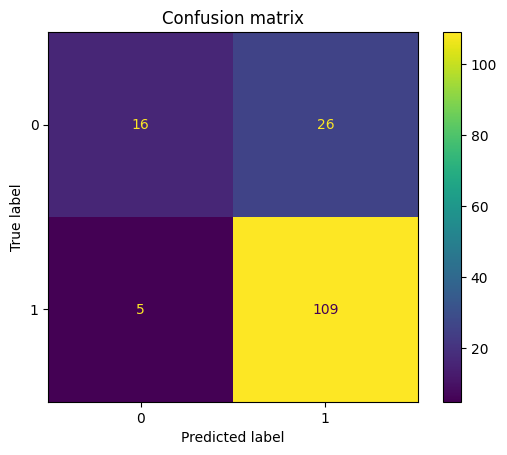

In [141]:
# previsão para o conjunto de teste
y_pred_test = lr_opt.predict(x_test_n)
cm=metrics.confusion_matrix(y_test, y_pred_test)
display(confusion_matrix)
cm_fig=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr_opt.classes_)
cm_fig.plot()
plt.title('Confusion matrix')
plt.show()

- Acurácia

In [145]:
accuracy = metrics.accuracy_score(y_test, y_pred_test)
print("O valor da acurácia é",accuracy)
print("O classificador obteve boa taxa de acerto.")

O valor da acurácia é 0.8012820512820513
O classificador obteve boa taxa de acerto.


- F1-Medida

In [144]:
F1 = metrics.f1_score(y_test, y_pred_test)
print("O valor da F1-Medida é",F1)
print("O classificador obteve bons resultados tanto na precisão quanto no recall.")

O valor da F1-Medida é 0.8755020080321286
O classificador obteve bons resultados tanto na precisão quanto no recall.


- Acurácia Balanceada

In [149]:
a_b = metrics.balanced_accuracy_score(y_test, y_pred_test)
print("O valor da acurácia balanceada é",a_b)
print("Valores de Especificidade não foram tão bons e valores de Recall foram muito bons.")

O valor da acurácia balanceada é 0.668546365914787
Valores de Especificidade não foram tão bons e valores de Recall foram muito bons.
